<a href="https://colab.research.google.com/github/UQROO-MarianaJetzuvelyGarciaHau/Colab-Tareas/blob/main/Ej_1_Comparaci%C3%B3n_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1: Comparación de Modelos de Clasificación

Objetivo: Comparar el rendimiento de tres algoritmos de clasificación: Regresión Logística, Árbol de Decisión y Random Forest.

Pasos:

1. Cargar un conjunto de datos de clasificación (por ejemplo, breast cancer de scikit-learn).

2. Dividir el conjunto de datos en entrenamiento y prueba.

3. Entrenar los tres modelos.

4. Evaluar cada modelo usando accuracy, precision, recall y F1-score.

5. Visualizar los resultados en gráficos comparativos.

Código en Python:


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        63
           1       0.95      0.94      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171

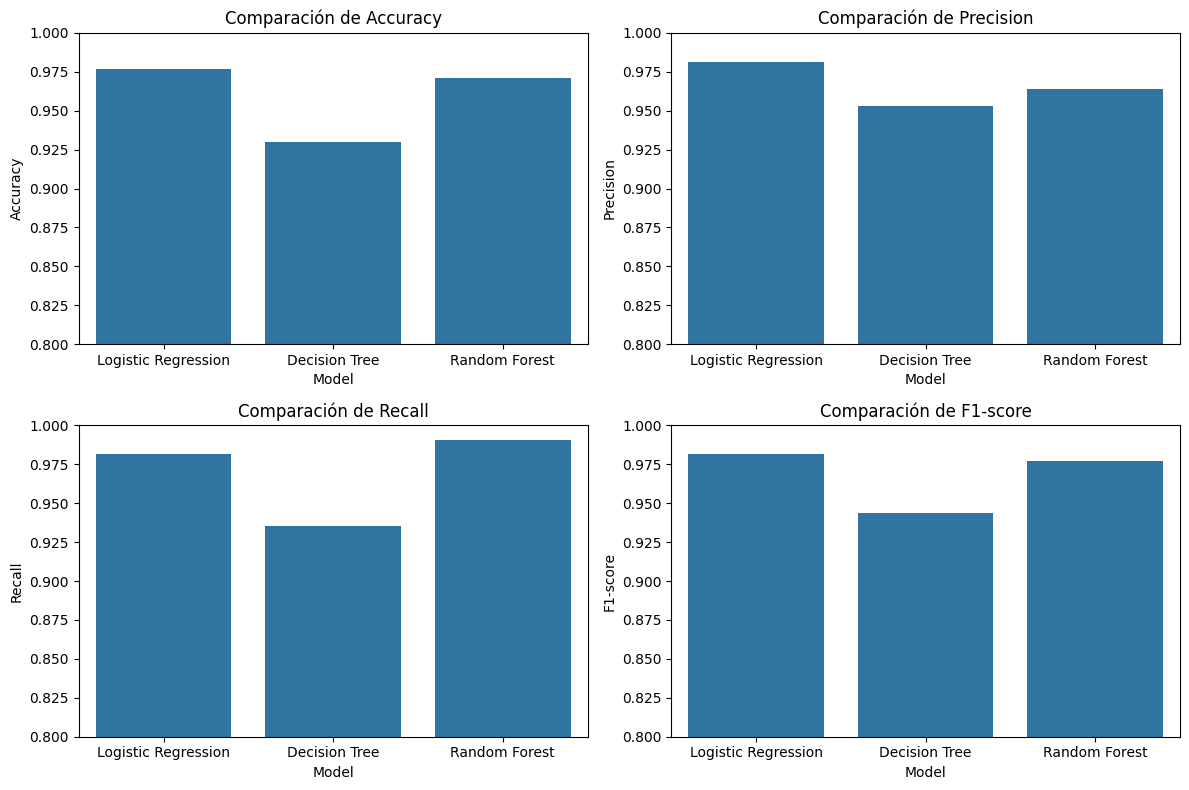

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000), # Aumentado max_iter
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Diccionario para almacenar los resultados
results = []

# Entrenar y evaluar
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Almacenar resultados
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })

    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)
print("\n--- Resumen de Métricas ---")
print(results_df)

# Visualizar los resultados
plt.figure(figsize=(12, 8))

# Bar plot para Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Comparación de Accuracy")
plt.ylim(0.8, 1.0)

# Bar plot para Precision
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Precision", data=results_df)
plt.title("Comparación de Precision")
plt.ylim(0.8, 1.0)

# Bar plot para Recall
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Recall", data=results_df)
plt.title("Comparación de Recall")
plt.ylim(0.8, 1.0)

# Bar plot para F1-score
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="F1-score", data=results_df)
plt.title("Comparación de F1-score")
plt.ylim(0.8, 1.0)

plt.tight_layout()
plt.show()

Preguntas de reflexión:

¿Cuál modelo obtuvo el mejor F1-score?

¿Qué diferencias observas entre precisión y recall en cada modelo?

¿Qué modelo recomendarías para este problema y por qué?

Recomendaciones: Utiliza gráficos de barras para visualizar las métricas y facilitar la comparación.